# Module 1: Brute Force Optimization

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Load fake data

(30, 1) (30, 1)


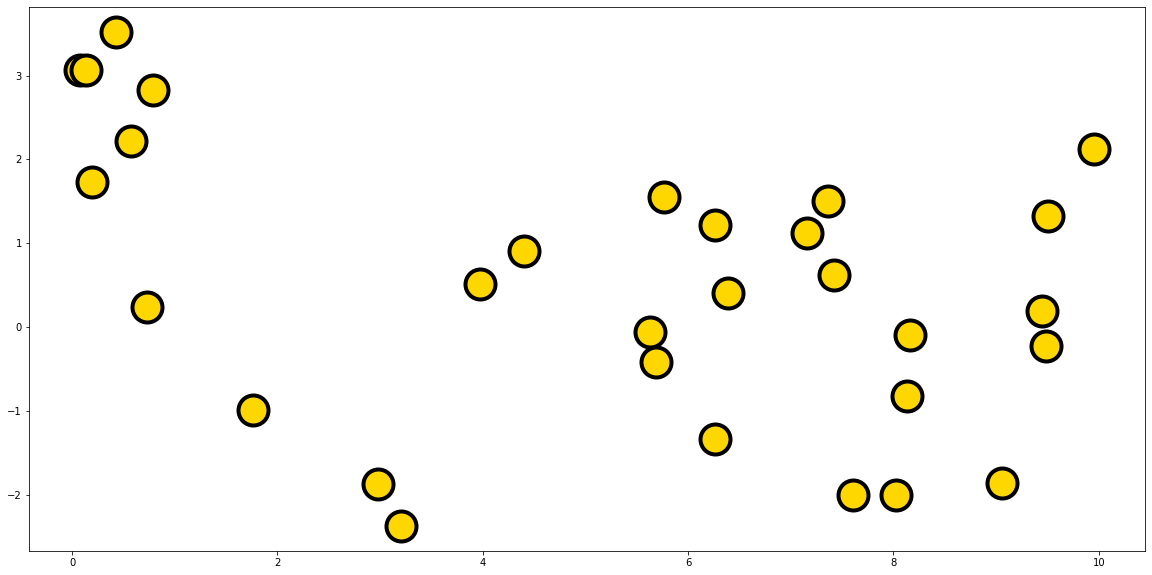

In [2]:
# read data
data = np.load('code/day2/fake_data.npz')

# assign X and y numpy arrays
X, y = data['X'], data['y']

# check their shapes
print(X.shape, y.shape)

# plot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

## Problem

Find a mathematical function that predicts $y$, given a value of $x$. 

## First Attempt: Null Model

Let us start with the simplest possible mathematical function: a function that always returns a constant $c$.

$$f(x) = c$$

And let's plot a few examples of this function for different values of $c$.

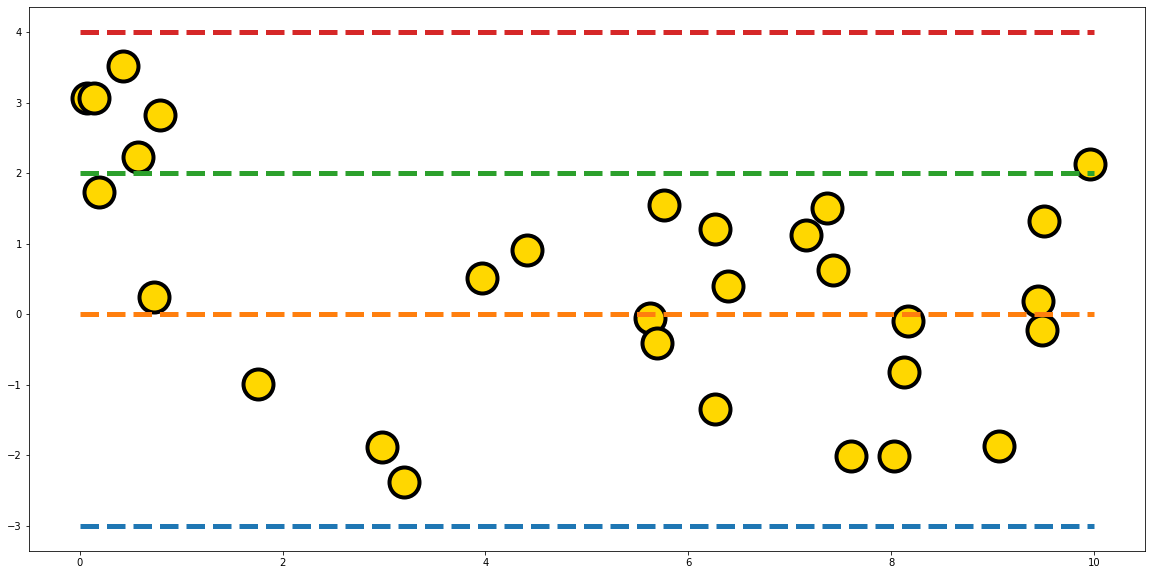

In [3]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# create 1000 evenly-spaced points from 0 to 10
xstar = np.linspace(0, 10, 1000)

# create an array with few candidate c's
cs = [-3, 0, 2, 4]

# for each candidate c
for c in cs:
    
    # compute the function over the range of xstar
    ystar = np.ones_like(xstar) * c
    
    # plot it
    ax.plot(xstar, ystar, linewidth=5, linestyle='dashed')


**<font color="red">
There are infinitely many functions that predict $y$ given $x$. Which one do we want?</font>**


### Objective Function

- We need to define how well a candidate function explains the data. For the kind of data we are working with, a common function is the **Mean Squared Error (MSE)**. 

- MSE computes the average squared <font color="red">difference</font> between the actual $y$ value and the candidate function at each input point $x$.

- We don't care about the direction of the difference (negative or positive), that's why we square the differences. We can also use the absolute value of the difference but MSE has more desirable mathematical properties.

![alt text](loss_demo.png)

$$\mathcal{L}(\mathbf{y},\hat{\mathbf{y}})=\frac{1}{N}\sum_{i=1}^{N}\left(\hat{y}(x_{i})-y_{i}\right)^2$$

### Optimization

Brute-force algorithm:

1. Pick a range of plausible $c$ values
2. Evaluate MSE at each $c$
3. Pick $c$ with lowest MSE

Here, $c$ is known as a _free parameter_ of the model because it is learned from the data.

In [4]:
# initialize the search "grid": 100 evenly-spaced points from -3 to 3
cs = np.linspace(-3, 3, 100)

# initialize an empty array to hold mse value for each candidate c
mses = []

# for each candidate c
for c in cs:
    
    # predict the value at the given x values (just a constant)
    yhat = np.ones_like(X) * c
    
    # compute mse
    mse = np.mean( np.square(yhat - y) )
    
    # add to results
    mses.append(mse)
    #print("c=%0.2f, MSE=%0.4f" % (c, mse))
    
# argmin returns the index of the element with the lowest value
best_ix = np.argmin(mses)

# using that index we can get the best c value
best_c = cs[best_ix]
print("Best c=%0.2f, MSE=%0.4f" % (best_c, mses[best_ix]))
null_mse = mses[best_ix]

Best c=0.45, MSE=2.6728


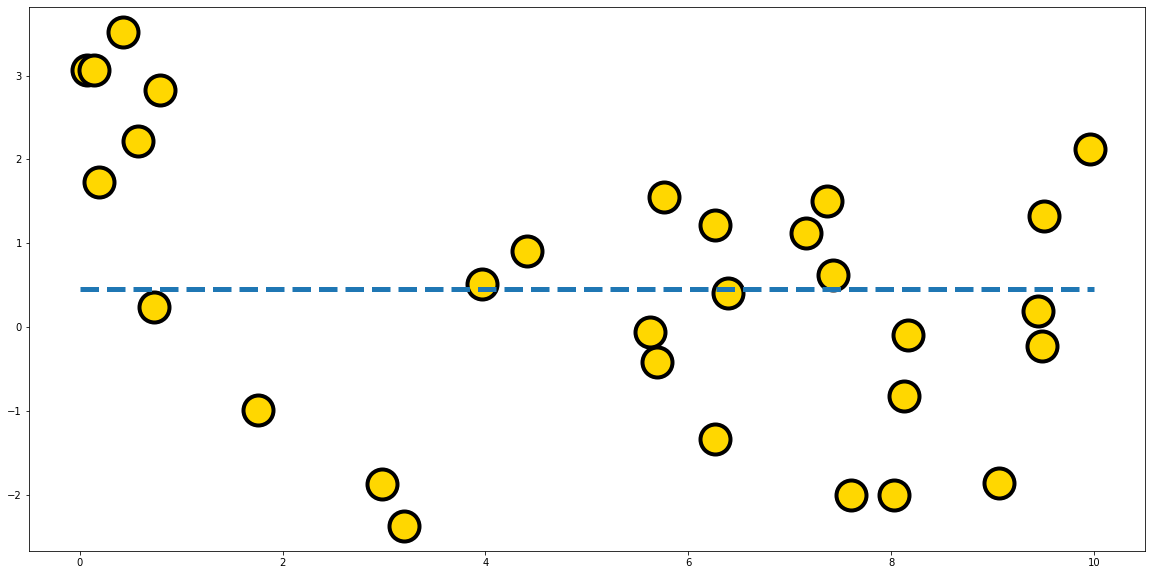

In [5]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# plot the best function
xstar = np.linspace(0, 10, 1000)
ystar = np.ones_like(xstar) * best_c
ax.plot(xstar, ystar, linewidth=5, linestyle='dashed')

## Second Attempt: Lines

- We can do better than a constant line! let's use a _sloped_ line:

$$f(x) = \beta_0 + \beta_1x$$

- We have _two_ parameters here: $\beta_0$ and $\beta_1$. $\beta_0$ controls the intercept with the y-axis and $\beta_1$ controls the slope. Here are a few examples:

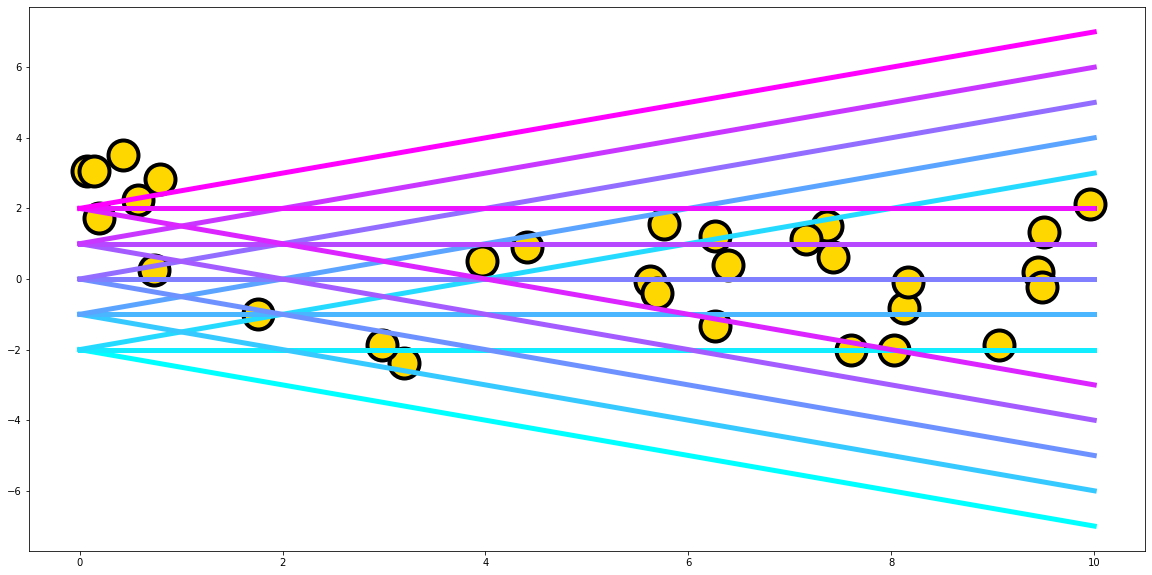

In [6]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# the betas we are going to evaluate
beta_0s = [-2, -1, 0, 1, 2]
beta_1s = [-0.5, 0, 0.5]

# define the color sequence used for individual lines
colors = plt.cm.cool(np.linspace(0, 1, len(beta_0s) * len(beta_1s)))

# draw the lines
xstar = np.linspace(0, 10, 1000)
l = 0
for b0 in beta_0s:
    for b1 in beta_1s:
        ys = b0 + b1 * xstar
        ax.plot(xstar, ys, linewidth=5, color=colors[l])
        l += 1

### Optimization

- Pick a range of $\beta_0$ and $\beta_1$ values
- For each combination of $\beta_0$ and $\beta_1$, evaluate MSE
- Pick the combination of $\beta_0$ and $\beta_1$ with the smallest MSE

![alt text](loss_demo_line.png)

<font color="red">Note:</font> If there are 10 $\beta_0$ values and 10 $\beta_1$ values, the total number of combinations that needs to be examined is $10 \times 10 = 100$.

In [7]:
# initialize the search grid
beta_0s = np.linspace(-3, 3, 100)
beta_1s = np.linspace(-3, 3, 100)

# initialize an empty array to hold mse value for each candidate c
mses = []

# for each candidate c
for b0 in beta_0s:
    for b1 in beta_1s:
        # predict the value at the given x values
        # using f(x) = b0 + b1*x
        yhat = b0 + b1 * X

        # compute mse
        mse = np.mean( np.square(yhat - y) )

        # add to results
        mses.append(mse)

# argmin returns the index of the element with the lowest value
best_ix = np.argmin(mses)

# mses is a 1-D array, so best_ix is just a single number
# we need to convert that number into an index into beta_0s and beta_1s
beta_ix_2d = np.unravel_index(best_ix, (len(beta_0s),len(beta_1s)))

# report ...
best_beta0 = beta_0s[beta_ix_2d[0]]
best_beta1 = beta_1s[beta_ix_2d[1]]
line_mse = mses[best_ix]
print("Best beta0: %0.2f, beta1: %0.2f, MSE: %0.4f" % (best_beta0, best_beta1, line_mse))
print("Null MSE: %0.4f vs. Line MSE: %0.4f" % (null_mse, line_mse))

Best beta0: 1.61, beta1: -0.21, MSE: 2.2170
Null MSE: 2.6728 vs. Line MSE: 2.2170


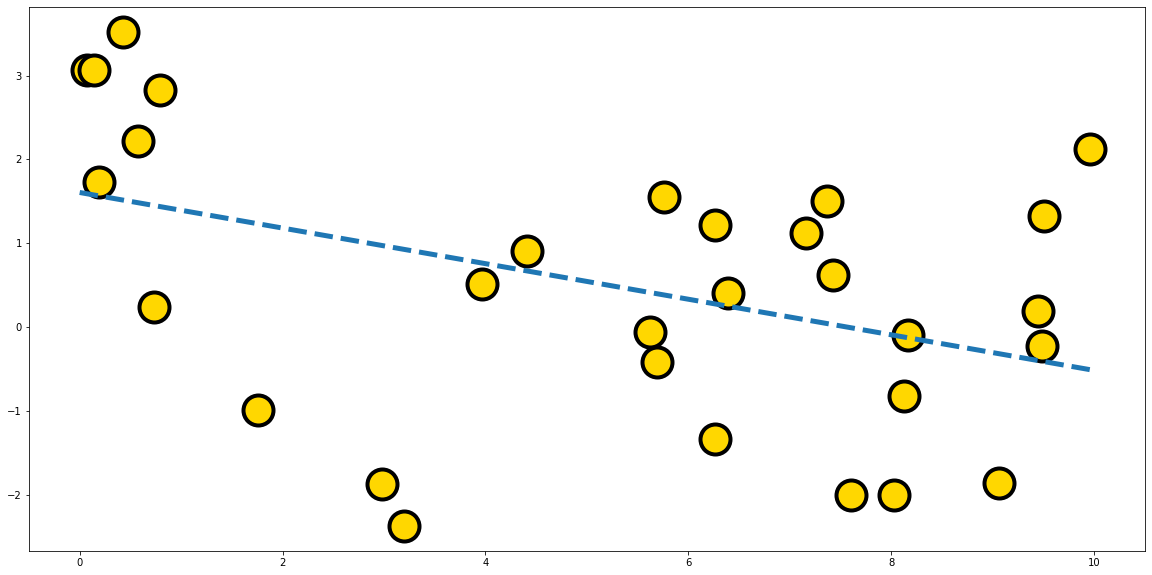

In [8]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# plot the best function
xstar = np.linspace(0, 10, 1000)
ystar = best_beta0 + best_beta1*xstar
ax.plot(xstar, ystar, linewidth=5, linestyle='dashed')

## Third Attempt: Sinusoids

- An expert says that the model should have the following form:
    
$$g(x) = cos(\beta_0 + \beta_1x) \\
f(x) = \gamma_0 + \gamma_1g(x)$$

- This model has _four_ parameters and it nonlinearly transforms the input $x$ through the $cos()$ function. Let's see what a few realizations from this model look like.

In [9]:
# define the ranges of parameter's we're gonna play with
gamma0s = [0]
gamma1s = [-3, -1, 0, 1, 3]
beta0s = [0]
beta1s = [3, 1]

# itertools is a built-in Python module that contains several
# useful functions to iterate over lists. We need it for a cool trick.
import itertools

# this generates all combinations of betas and gammas
# returns a list of 4-element tuples
thetas = list(itertools.product(beta0s, beta1s, gamma0s, gamma1s))
print(thetas)

[(0, 3, 0, -3), (0, 3, 0, -1), (0, 3, 0, 0), (0, 3, 0, 1), (0, 3, 0, 3), (0, 1, 0, -3), (0, 1, 0, -1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 0, 3)]


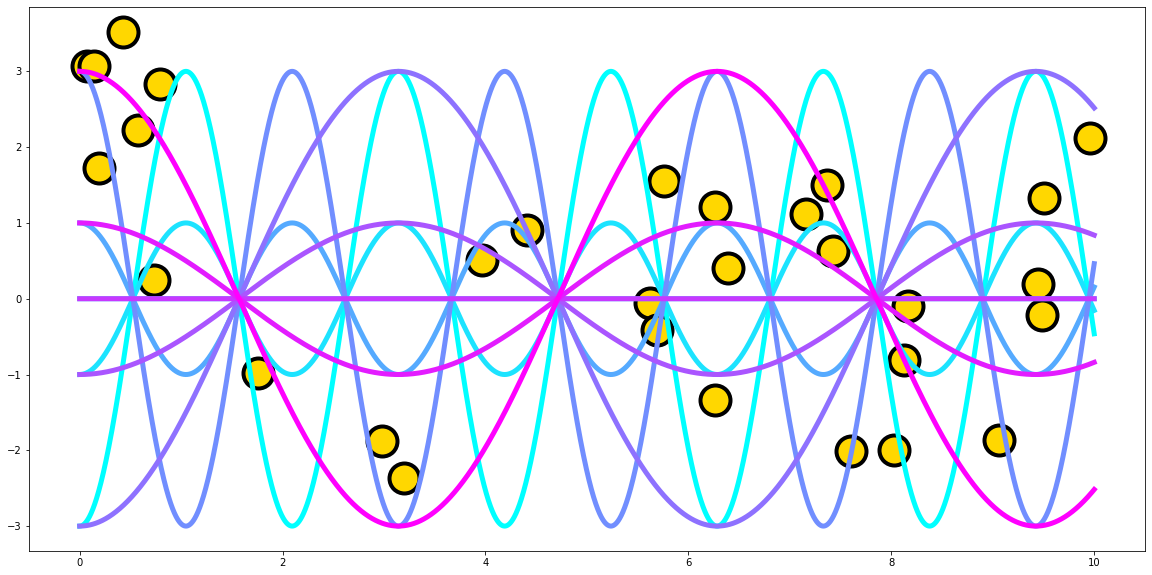

In [10]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# define colormap
colors = plt.cm.cool(np.linspace(0, 1, len(thetas)))

# draw functions
xstar = np.linspace(0, 10, 10000)
l = 0
for l in range(len(colors)):
    b0, b1, g0, g1 = thetas[l]
    ys = g0 + g1 * np.cos(b0 + b1 * xstar)
    ax.plot(xstar, ys, linewidth=5, color=colors[l])

### Optimization

- Pick a range of $\beta_0$,  $\beta_1$, $\gamma_0$, and $\gamma_1$ values
- For each combination of $\beta_0$,  $\beta_1$, $\gamma_0$, and $\gamma_1$, evaluate MSE
- Pick the combination of $\beta_0$,  $\beta_1$, $\gamma_0$, and $\gamma_1$ with the smallest MSE

Try increasing the number of values to examine. See how long it takes to search for the best parameter values.

In [11]:
# initialize the search grid
N = 10
beta_0s = np.linspace(-3, 3, N)
beta_1s = np.linspace(-3, 3, N)
gamma_0s = np.linspace(-3, 3, N)
gamma_1s = np.linspace(-3, 3, N)

# initialize an empty array to hold mse value for each candidate c
mses = []

# the list of combinations to examine
thetas = list(itertools.product(beta_0s, beta_1s, gamma_0s, gamma_1s))

for i in range(len(thetas)):
    b0, b1, g0, g1 = thetas[i]
    yhat = g0 + g1 * np.cos(b0 + b1 * X)
    mse = np.mean( np.square(yhat - y) )
    mses.append(mse)

# argmin returns the index of the element with the lowest value
best_ix = np.argmin(mses)

# unravel into a 4-d index
best_ix_4d = np.unravel_index(best_ix, (N, N, N, N))

# report ...
best_beta0 = beta_0s[best_ix_4d[0]]
best_beta1 = beta_1s[best_ix_4d[1]]
best_gamma0 = gamma_0s[best_ix_4d[2]]
best_gamma1 = gamma_1s[best_ix_4d[3]]

nonlinear_mse = mses[best_ix]
print("Best beta0: %0.2f, beta1: %0.2f, gamm0: %0.2f, gamma1: %0.2f" % 
      (best_beta0, best_beta1, best_gamma0, best_gamma1))
print("Null MSE: %0.4f vs. Line MSE: %0.4f vs. Nonlinear MSE: %0.4f" % (null_mse, line_mse, nonlinear_mse))

Best beta0: -1.00, beta1: -0.33, gamm0: 1.00, gamma1: 1.67
Null MSE: 2.6728 vs. Line MSE: 2.2170 vs. Nonlinear MSE: 1.9684


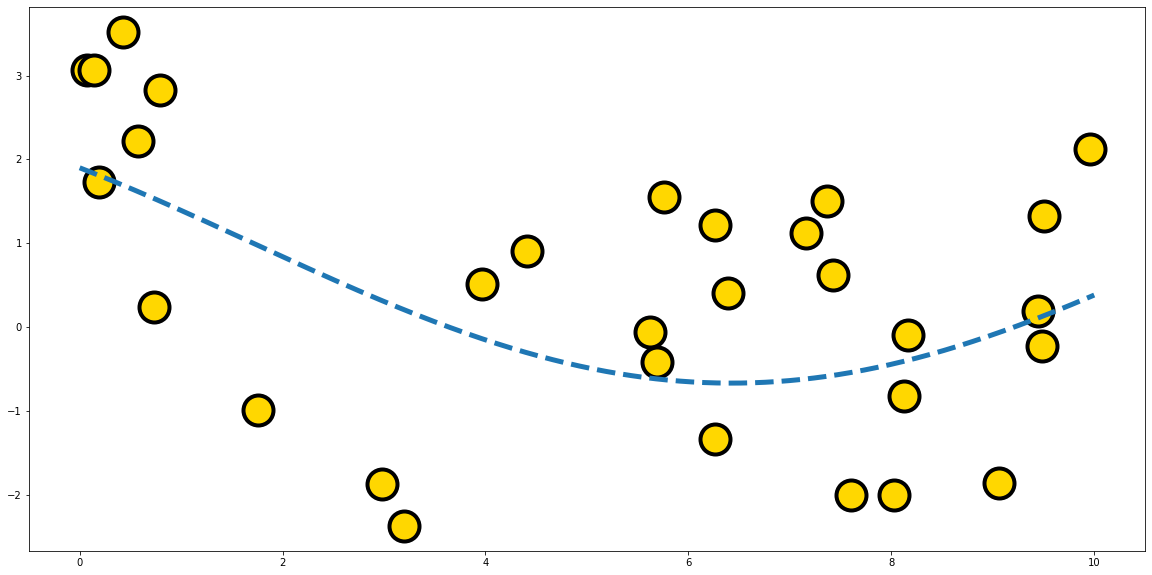

In [12]:
# replot data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(X, y, 'o', color='gold', markersize=30, 
        markeredgewidth=4, markeredgecolor='black')

# plot the best function
xstar = np.linspace(0, 10, 1000)
ystar = np.cos(best_beta0 + best_beta1*xstar) * best_gamma1 + best_gamma0
ax.plot(xstar, ystar, linewidth=5, linestyle='dashed')

## Recap and Conclusions

- A mathematical model has a number of "knobs" known as free parameters 
- The values of the free parameters are learned from the data using an optimization algorithm
- Any optimization algorithm needs an objective to minimize or maximize
- Mean Squared Error (MSE) is a common objective in optimization
- One of the simplest optimization algorithms is brute-force or grid-search which systematically looks at all combinations of free parameter values
- Brute-force or grid-search works when the model only has few parameters
- But it quickly becomes infeasible as the number of parameters increases 